#  0. Import python module 

In [1]:
%matplotlib inline

from sklearn.linear_model import LinearRegression
import sklearn.metrics
import sklearn.linear_model
import pandas
import numpy
import scipy
import datetime
import matplotlib.pyplot
import matplotlib.dates
import math

# 1. Harvest data

## 1.1 Load havest data and reformat it

In [2]:
df_gt_harvest = pandas.read_csv("data/2018_08_ground_truth.csv")

for column_name in ['poids_moy_1_fruit',
                    'poids_recolte',
                    'poids_recoltes_avec_sol',
                    'Nb_fruits_recoltes',
                    'Nb_fruits_recoltes_avec_sol']:
    
    # Convert in numeric format
    df_gt_harvest[column_name] = pandas.to_numeric(df_gt_harvest[column_name], 
                                                   downcast='float', 
                                                   errors='coerce')

# Convert date in datetime
df_gt_harvest['date_recolte'] = pandas.to_datetime(df_gt_harvest['date_recolte'], 
                                                   format='%m/%d/%Y', 
                                                   errors='coerce', 
                                                   utc=False)

# Select measurements only for data scanned
# df_gt_harvest = df_gt_harvest[numpy.bitwise_and(df_gt_harvest['Ligne'] <= 4, 
#                                                 df_gt_harvest['Position'] <= 20)]

# Select data after the scan time periode
df_gt_harvest = df_gt_harvest[df_gt_harvest['date_recolte'] >= pandas.Timestamp('2018-08-02')]

# Remove NAN value
df_gt_harvest = df_gt_harvest.dropna()

df_gt_harvest["harvest_nb_fruit_floor"] =  df_gt_harvest["Nb_fruits_recoltes_avec_sol"] - df_gt_harvest["Nb_fruits_recoltes"]
df_gt_harvest["harvest_weight_fruit_floor"] =  df_gt_harvest["poids_recoltes_avec_sol"] - df_gt_harvest["poids_recolte"]

df_gt_harvest = df_gt_harvest.rename(
    columns={"Ligne": "line", 
             "Position": "position", 
             "Nb_fruits_recoltes_avec_sol": "harvest_nb_fruit",
             "poids_recoltes_avec_sol": "harvest_weight_fruit",
             "poids_recolte": "harvest_weight_fruit_tree",
             "Nb_fruits_recoltes": "harvest_nb_fruit_tree"})

#df_gt_harvest['line'] = abs(df_gt_harvest['line'] - 11)
# print(max(df_gt_harvest['position']))

# Plot the dataframe
df_gt_harvest = df_gt_harvest[numpy.bitwise_and(df_gt_harvest['line'] <= 4, 
                                                df_gt_harvest['position'] <= 20)]

df_gt_harvest

,date_recolte,WT,line,position,code,Geno,poids_moy_1_fruit,harvest_weight_fruit_tree,harvest_nb_fruit_tree,harvest_weight_fruit,harvest_nb_fruit,harvest_nb_fruit_floor,harvest_weight_fruit_floor
0,2018-09-14,WW,1,1,36.0,X0036,0.107,8.590000,79.981003,11.919000,110.981003,31.000000,3.329000
1,2018-09-14,WD,2,1,36.0,X0036,0.095,0.667000,7.000000,1.239000,13.000000,6.000000,0.572000
8,2018-08-27,WW,1,3,156.0,X0156,0.211,22.190001,105.066002,25.780001,122.066002,17.000000,3.590000
9,2018-08-27,WD,2,3,156.0,X0156,0.162,23.350000,143.781006,26.273001,161.781006,18.000000,2.923000
13,2018-09-11,WD,2,4,337.0,X0337,0.216,13.620000,63.000000,16.430000,76.000000,13.000000,2.810000
17,2018-09-11,WD,2,5,342.0,X0342,0.122,15.930000,130.147003,17.032000,139.147003,9.000000,1.101999
20,2018-09-07,WW,1,6,344.0,X0344,0.098,18.500000,188.776001,20.459999,208.776001,20.000000,1.959999
21,2018-09-07,WD,2,6,344.0,X0344,0.105,21.469999,205.257996,22.516001,215.257996,10.000000,1.046001
29,2018-09-11,WD,2,8,380.0,X0380,0.109,1.090000,10.000000,2.616000,24.000000,14.000000,1.526000
32,2018-10-08,WW,1,9,395.0,X0395,0.147,4.840000,33.000000,5.573000,38.000000,5.000000,0.733000


# 2. Labeled Data

## 2.1 Load labeled ground thruth

In [3]:
df_gt_labeled = pandas.read_csv('data/gt_labeled.csv')
df_gt_labeled["nb_fruit"] = df_gt_labeled["nb_fruit_floor"] + df_gt_labeled["nb_fruit_tree"]
df_gt_labeled

,basename,date,line,position,nb_fruit_floor,nb_fruit_tree,nb_fruit
0,pc_2018_08_02_L01_P10_filtered_labeled,2018_08_02,1,10,0,2,2
1,pc_2018_08_02_L01_P15_filtered_labeled,2018_08_02,1,15,13,30,43
2,pc_2018_08_02_L01_P17_filtered_labeled,2018_08_02,1,17,0,0,0
3,pc_2018_08_02_L01_P20_filtered_labeled,2018_08_02,1,20,4,22,26
4,pc_2018_08_02_L02_P01_filtered_labeled,2018_08_02,2,1,1,9,10
5,pc_2018_08_02_L02_P08_filtered_labeled,2018_08_02,2,8,5,60,65
6,pc_2018_08_02_L02_P15_filtered_labeled,2018_08_02,2,15,0,0,0
7,pc_2018_08_02_L04_P09_filtered_labeled,2018_08_02,4,9,22,3,25


## 2.2 Load labeled  measurements (post processing)

In [5]:
df_labeled_measurements = pandas.read_csv('field_measurements_LABELED_DBSCAN.csv')
df_labeled_measurements

,basename,date,line,position,nb_fruit
0,tree_2018_08_02_L01_P10_filtered_labeled.txt,2018_08_02,1,10,2
1,tree_2018_08_03_L05_P07_filtered_labeled.txt,2018_08_03,5,7,12
2,tree_2018_08_02_L02_P01_filtered_labeled.txt,2018_08_02,2,1,5
3,tree_2018_08_02_L02_P08_filtered_labeled.txt,2018_08_02,2,8,21
4,tree_2018_08_02_L04_P09_filtered_labeled.txt,2018_08_02,4,9,10
5,tree_2018_08_02_L01_P20_filtered_labeled.txt,2018_08_02,1,20,26
6,tree_2018_08_02_L01_P15_filtered_labeled.txt,2018_08_02,1,15,36
7,tree_2018_08_02_L03_P16_filtered_labeled.txt,2018_08_02,3,16,22


## 2.3 Analysis - Ground truth and measurements

### 2.3.0 Declare useful function

In [6]:
matplotlib.pyplot.rcParams["figure.figsize"] = (15, 15)
camp = matplotlib.pyplot.get_cmap('hsv', 20)

def plot_R2_linear_model(axis, df_colum_1, df_colum_2, color='r'):

    X = numpy.array([df_colum_1.to_numpy()]).T
    y = df_colum_2.to_numpy()
    
    axis.plot(X, y, c=color, marker='.', linestyle='')
    
    reg = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(X, y)
    axis.plot(X, reg.predict(X), 'b--', label="R² = {0:.2f}".format(reg.score(X, y)))
    
    reg = sklearn.linear_model.LinearRegression(fit_intercept=False).fit(X, y)
    axis.plot(X, reg.predict(X), 'k--', label="R² = {0:.2f}".format(reg.score(X, y)))
    
    handles, labels = axis.get_legend_handles_labels()
    axis.legend(handles, labels)
    
    axis.set_xlabel(df_colum_1.name)
    axis.set_ylabel(df_colum_2.name)

### 2.3.1 Merge the data

In [7]:
df_comparison = pandas.merge(df_gt_labeled, 
                             df_labeled_measurements,
                             left_on=['line', 'position'], 
                             right_on=['line', 'position'])
df_comparison

,basename_x,date_x,line,position,nb_fruit_floor,nb_fruit_tree,nb_fruit_x,basename_y,date_y,nb_fruit_y
0,pc_2018_08_02_L01_P10_filtered_labeled,2018_08_02,1,10,0,2,2,tree_2018_08_02_L01_P10_filtered_labeled.txt,2018_08_02,2
1,pc_2018_08_02_L01_P15_filtered_labeled,2018_08_02,1,15,13,30,43,tree_2018_08_02_L01_P15_filtered_labeled.txt,2018_08_02,36
2,pc_2018_08_02_L01_P20_filtered_labeled,2018_08_02,1,20,4,22,26,tree_2018_08_02_L01_P20_filtered_labeled.txt,2018_08_02,26
3,pc_2018_08_02_L02_P01_filtered_labeled,2018_08_02,2,1,1,9,10,tree_2018_08_02_L02_P01_filtered_labeled.txt,2018_08_02,5
4,pc_2018_08_02_L02_P08_filtered_labeled,2018_08_02,2,8,5,60,65,tree_2018_08_02_L02_P08_filtered_labeled.txt,2018_08_02,21
5,pc_2018_08_02_L04_P09_filtered_labeled,2018_08_02,4,9,22,3,25,tree_2018_08_02_L04_P09_filtered_labeled.txt,2018_08_02,10


### 2.3.1 Compare

Post processing efficiency vs GT

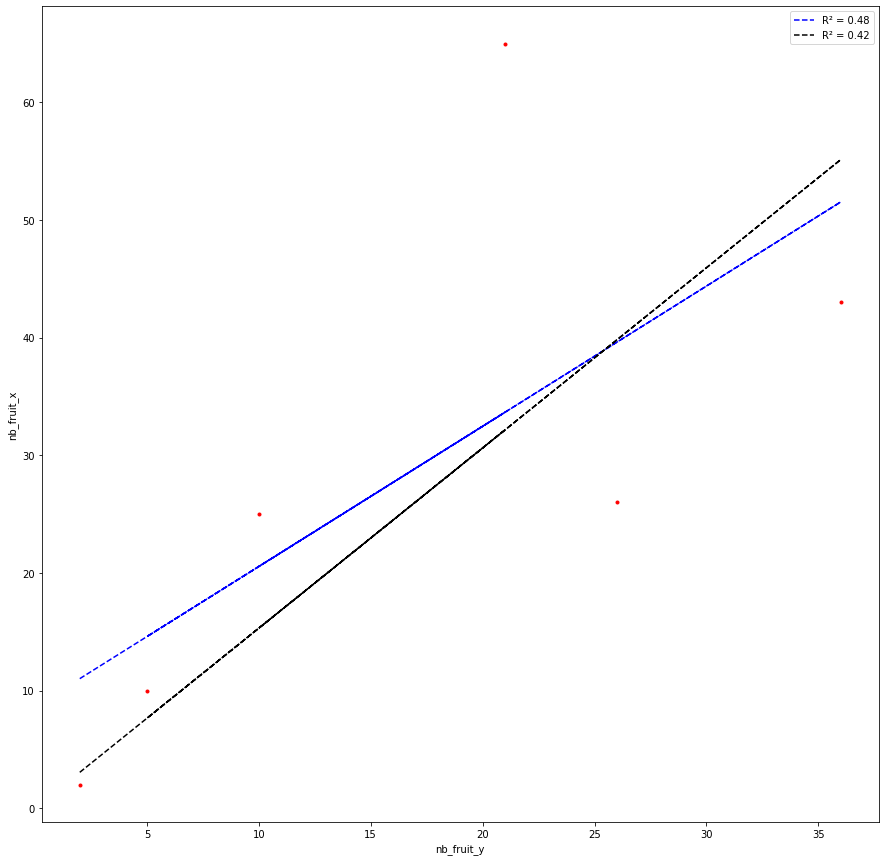

In [9]:
fig, axis = matplotlib.pyplot.subplots(1, 1)

plot_R2_linear_model(axis,
                     df_comparison["nb_fruit_y"],
                     df_comparison['nb_fruit_x'], 
                     color='r')

matplotlib.pyplot.show()

# 3. Analysis - Harvest and GT Labeled data

## 3.1 Merge data

In [10]:
df_comparison = pandas.merge(df_gt_harvest, 
                             df_gt_labeled,
                             left_on=['line', 'position'], 
                             right_on=['line', 'position'])
df_comparison

,date_recolte,WT,line,position,code,Geno,poids_moy_1_fruit,harvest_weight_fruit_tree,harvest_nb_fruit_tree,harvest_weight_fruit,harvest_nb_fruit,harvest_nb_fruit_floor,harvest_weight_fruit_floor,basename,date,nb_fruit_floor,nb_fruit_tree,nb_fruit
0,2018-09-14,WD,2,1,36.0,X0036,0.095,0.667,7.000000,1.239,13.000000,6.0,0.572,pc_2018_08_02_L02_P01_filtered_labeled,2018_08_02,1,9,10
1,2018-09-11,WD,2,8,380.0,X0380,0.109,1.090,10.000000,2.616,24.000000,14.0,1.526,pc_2018_08_02_L02_P08_filtered_labeled,2018_08_02,5,60,65
2,2018-08-27,WW,1,15,591.0,X0591,0.164,8.740,53.292999,8.740,53.292999,0.0,0.000,pc_2018_08_02_L01_P15_filtered_labeled,2018_08_02,13,30,43
3,2018-09-07,WW,1,20,667.0,X0667,0.345,10.350,30.000000,14.835,43.000000,13.0,4.485,pc_2018_08_02_L01_P20_filtered_labeled,2018_08_02,4,22,26
4,2018-08-27,WD,4,9,7197.0,X7197,0.120,0.120,1.000000,0.360,3.000000,2.0,0.240,pc_2018_08_02_L04_P09_filtered_labeled,2018_08_02,22,3,25


## 3.2 Compare

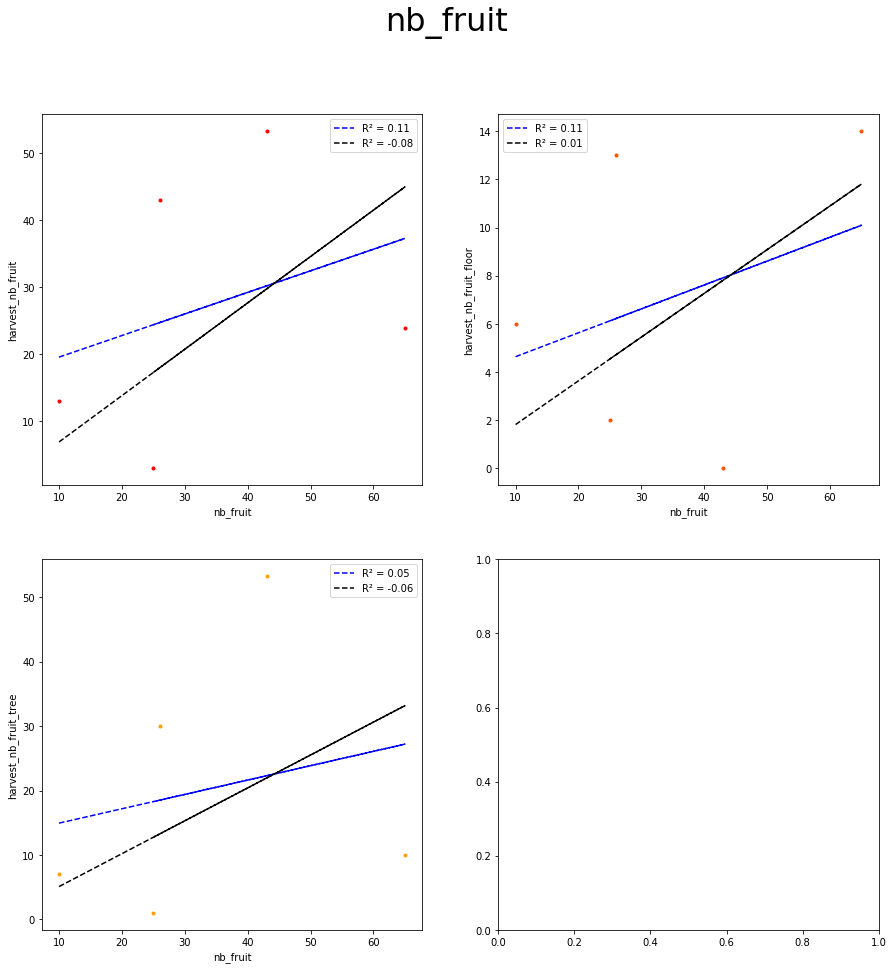

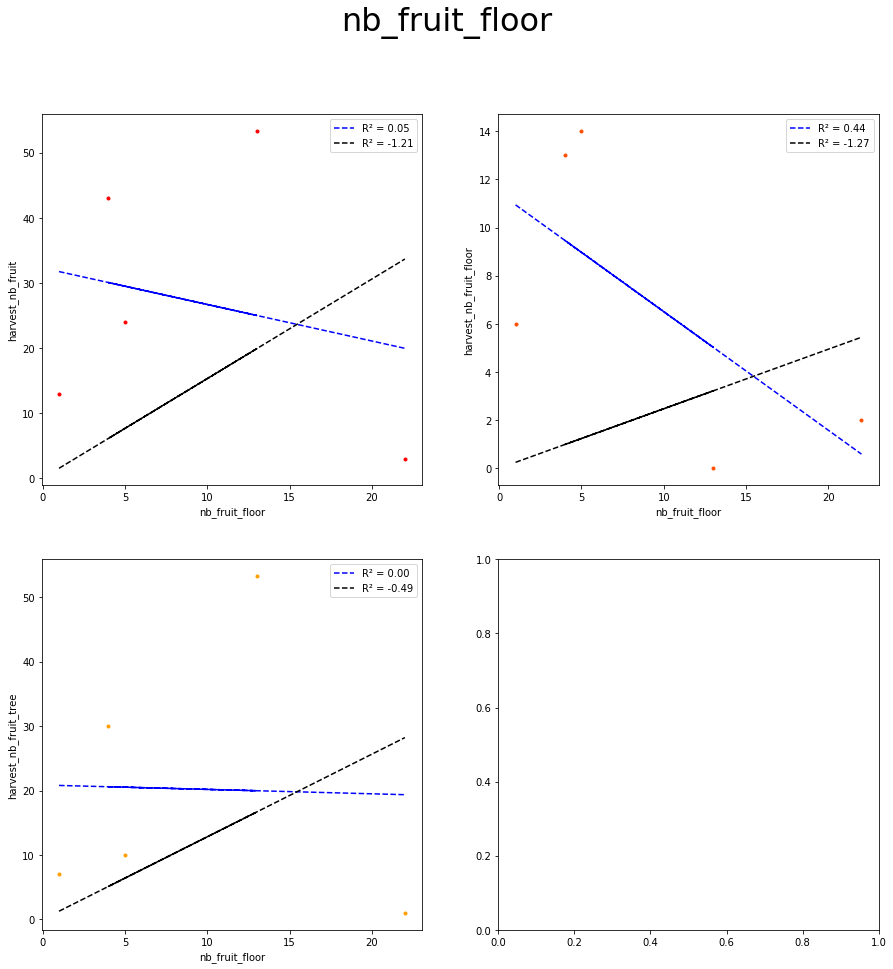

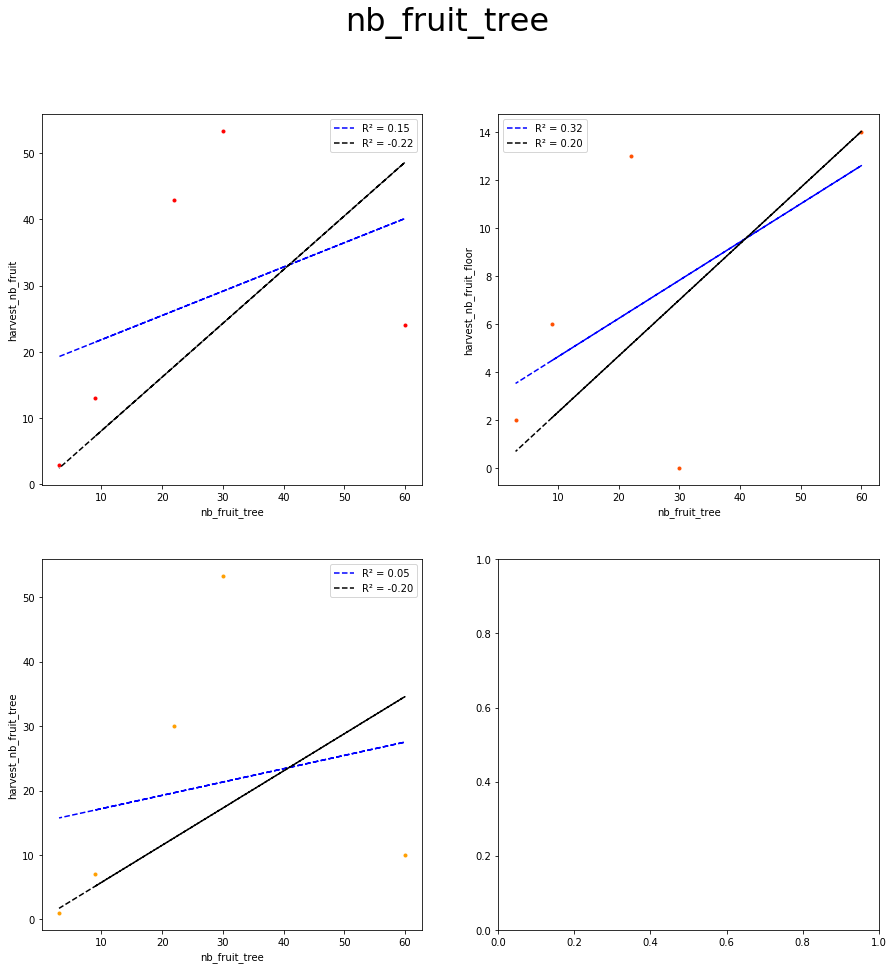

In [11]:
elements = ['harvest_nb_fruit', 
            'harvest_nb_fruit_floor',
            'harvest_nb_fruit_tree']

for name_1 in ['nb_fruit', 'nb_fruit_floor', 'nb_fruit_tree']:
    
    fig, axis = matplotlib.pyplot.subplots(2, 2)
    
    fig.suptitle(name_1, fontsize=32)
    
    for i, name_2 in enumerate(elements):
        
        plot_R2_linear_model(axis.flat[i],
                             df_comparison[name_1],
                             df_comparison[name_2], 
                             color=camp(i))
    matplotlib.pyplot.show()

# ## 3 Analysis - GT Harvest and labeled measurements

In [ ]:
df_comparison = pandas.merge(df_gt_harvest, 
                             df_labeled_measurements,
                             left_on=['line', 'position'], 
                             right_on=['line', 'position'])
df_comparison

In [ ]:
elements = ['harvest_nb_fruit', 
            'harvest_nb_fruit_floor',
            'harvest_nb_fruit_tree']

for name_1 in ['nb_fruit_detected']:
    
    fig, axis = matplotlib.pyplot.subplots(2, 2)
    
    fig.suptitle(name_1, fontsize=32)
    
    for i, name_2 in enumerate(elements):
        
        plot_R2_linear_model(axis.flat[i],
                             df_comparison[name_1],
                             df_comparison[name_2], 
                             color=camp(i))
    matplotlib.pyplot.show()


In [ ]:
elements = ['harvest_weight_fruit', 
            'harvest_weight_fruit_floor',
            'harvest_weight_fruit_tree']

for name_1 in ['volumes']:
    
    fig, axis = matplotlib.pyplot.subplots(2, 2)
    
    fig.suptitle(name_1, fontsize=32)
    
    for i, name_2 in enumerate(elements):
        
        plot_R2_linear_model(axis.flat[i],
                             df_comparison[name_1],
                             df_comparison[name_2], 
                             color=camp(i))
    matplotlib.pyplot.show()